In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [4]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)

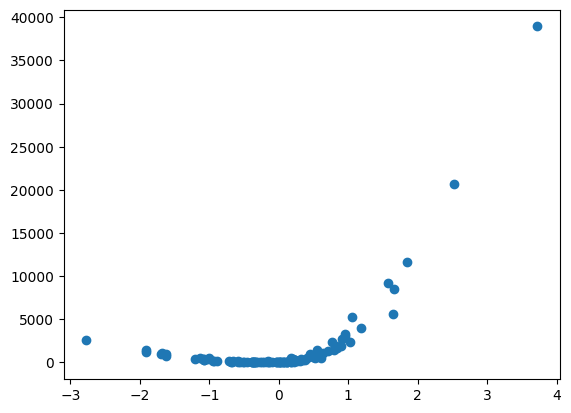

In [86]:
y = y + abs(y/2)**2
plt.scatter(x, y)

In [87]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [15]:
y = y.reshape(y.shape[0], 1)

In [88]:
y.shape

(100, 1)

In [122]:
theta = np.random.randn(3, 1)

In [123]:
theta

array([[-0.57252744],
       [ 0.08635047],
       [ 0.97189813]])

In [124]:
X = np.hstack((x, np.ones((x.shape[0], 1))))
X = np.hstack((x**2, X))

In [125]:
X.shape

(100, 3)

In [126]:
def model(X, theta):
    return X.dot(theta)

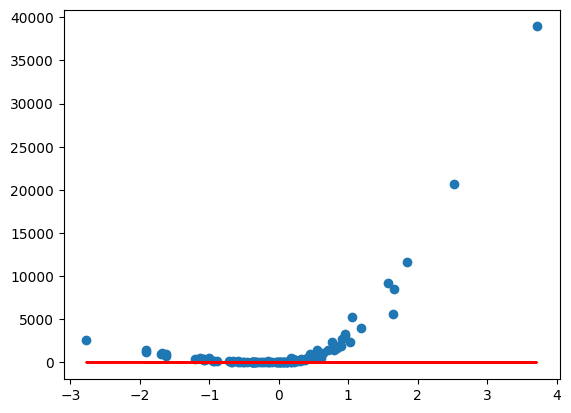

In [127]:
plt.plot(x, model(X, theta), c='r')
plt.scatter(x, y)

In [128]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [129]:
cost_function(X, y, theta)

11939777.383310895

In [130]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [131]:
grad(X, y, theta)

array([[-8446.86181469],
       [-2676.19495467],
       [-1503.77838498]])

In [132]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [138]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=300)

In [139]:
theta_final

array([[1960.19656251],
       [2242.093063  ],
       [-126.0162747 ]])

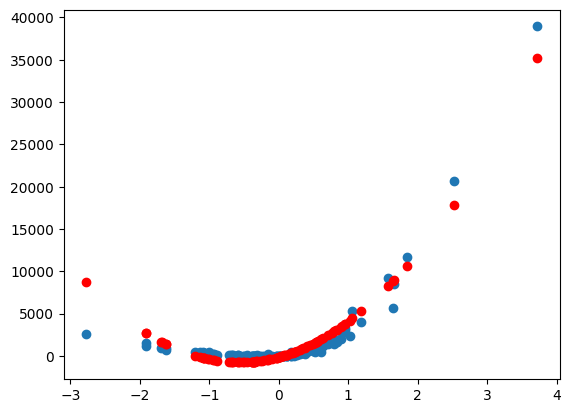

In [140]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

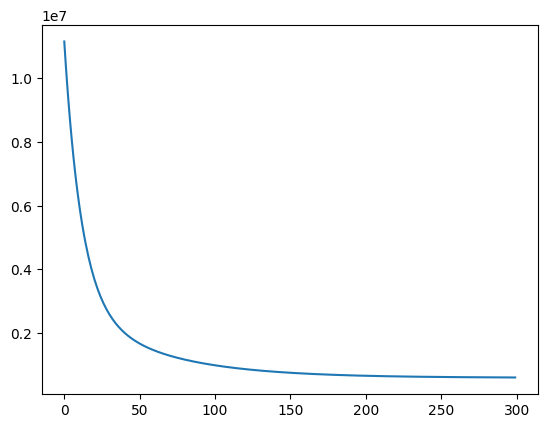

In [141]:
plt.plot(range(300), cost_history)

In [142]:
def cost_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u / v

In [143]:
cost_determination(y, predictions)

0.9440986236548213